<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


# 1. About the Data

This data set's name is "Vehicle dataset". It is taken from Kaggle.com, here is the link to website incase you need it:
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data?select=car+data.csv
The model we are going to make will be focused on prediction.
Data set includes information about car business. It includes information about car's sold price, current price and model etc.
Here is a list of columns in our dataset:

name (model of the car)
year (model's manifactured year)
selling_price (price it was sold)
km_driven (Kilometers driven)
fuel (Fuel type, could be diesel, motorin)
seller_type (Type of the seller, could be dealer, individual)
transmission (Manuel or Automatic)
Owner (Number of owners car had)


# 2. Objectives

Our objective is to find the best model for predicting a car's sold price by using Linear regression models.
We are going to use 3 regression models,  Linear regression, Ridge Regression and Lasso regression.
In this process we are going to compare our results (mean squared error) first without further enforcement on our data.
After that we are going to use a pipe to get mean squared error by playing our dimensions.

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [2]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [3]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, GridSearchCV

Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [4]:
## Importing the Dataset
data = pd.read_csv("C:/Users\plaoz/veri bilim/car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
data = pd.get_dummies(data = data)
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Car_Name_800', 'Car_Name_Activa 3g', 'Car_Name_Activa 4g',
       'Car_Name_Bajaj  ct 100', 'Car_Name_Bajaj Avenger 150',
       ...
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object', length=110)

Text(0.5, 1.0, 'Year vs Price')

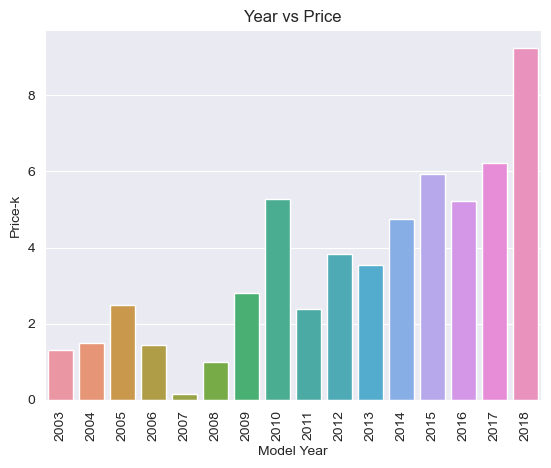

In [8]:
data_grouped = data.groupby("Year")["Selling_Price"].mean().reset_index()
sns.barplot(data = data_grouped, x = "Year", y = "Selling_Price")
plt.xticks(rotation = 90)
plt.xlabel("Model Year")
plt.ylabel("Price-k")
plt.title("Year vs Price")

In [9]:
nan_sum = data.isna().sum()
nan_sum 

Year                      0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
                         ..
Fuel_Type_Petrol          0
Seller_Type_Dealer        0
Seller_Type_Individual    0
Transmission_Automatic    0
Transmission_Manual       0
Length: 110, dtype: int64

There is no NaN values, great!

C:\Users\plaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='Year', ylabel='Selling_Price'>

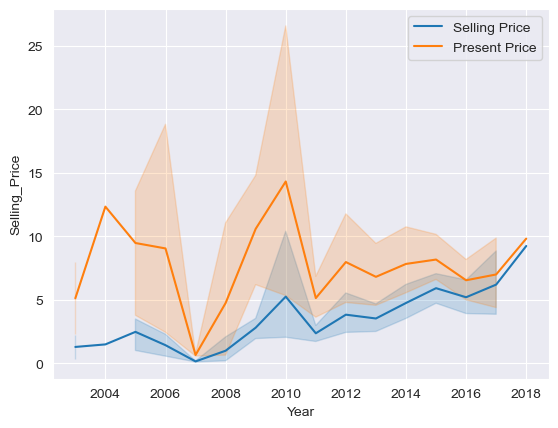

In [10]:
sns.lineplot(data=data, x="Year", y="Selling_Price", label="Selling Price")
sns.lineplot(data=data, x="Year", y="Present_Price", label="Present Price")

I wanted to see the price movement by myself. This data is already almost ready to be fed into a model.

In [11]:
X = data.drop("Selling_Price", axis = 1)
y = data["Selling_Price"]

We seperate our Selling Price column, which is our target variable.

# 3. Linear Regression Models

In [12]:
#X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In this part I created a pipeline for every single model

In [13]:
pipeline_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])
pipeline_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge())
])
pipeline_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso())
])

pipelines = {"Linear_Regression": pipeline_lr, "Ridge" : pipeline_ridge, "Lasso" : pipeline_lasso}

In [14]:
kf = KFold(n_splits= 5, shuffle = True, random_state= 55)

In [15]:
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y , cv = kf, scoring = "neg_mean_squared_error")
    print(f"Model: {name}, mean mse: {abs(scores.mean()):.4f}")

Model: Linear_Regression, mean mse: 499367229831246253708541952.0000
Model: Ridge, mean mse: 7.3889
Model: Lasso, mean mse: 6.5390


We can compare our model performances. We can see that Lasso Regression gave us a better mean mse.
There is a problem, Linear_Regression mean mse is too high to be true.

In [16]:
predictions = cross_val_predict(pipeline, X, y, cv = kf)

 Now I am going to train 3 models again but this time we will increase our dimensions by using polynomial features. I will use a new pipeline where I only need to put the model name instead of creating a pipeline for every model like the previous test.

In [69]:
models = [("Linear_Regression", LinearRegression()),
          ("Ridge" , Ridge()),
          ("Lasso" , Lasso(max_iter=10000))]

full_pipeline = Pipeline([
    ("poly", PolynomialFeatures()),
    ("scaler", StandardScaler()),
    ("model", None) #I place a place holder here so we can put the model we want
])

param_grid = {
    "poly__degree": [1,2,3],
    "model": [model for _, model in models] #Models we are going to test
}

grid_search = GridSearchCV(full_pipeline, param_grid, scoring="neg_mean_squared_error", cv = kf)
grid_search.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=55, shuffle=True),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('model', None)]),
             param_grid={'model': [LinearRegression(), Ridge(),
                                   Lasso(max_iter=10000)],
                         'poly__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [115]:
best_model = grid_search.best_estimator_
coefficients = best_model[2].coef_
len_coef = len(coefficients)
print("Number of features in the best model: ", len_coef)
print("Best parameters:", grid_search.best_params_)
print("Best absolute Mean Squared Error:", abs(grid_search.best_score_))

Number of features in the best model:  227920
Best parameters: {'model': Lasso(max_iter=10000), 'poly__degree': 3}
Best absolute Mean Squared Error: 6.1028889108403535


this is a problematic part because I am not sure If this realy counted created features.

In [141]:
cv_results = grid_search.cv_results_
target = cv_results["params"][8] #This is the best model which our grid_search gave us.
poly_degree = target["poly__degree"]
feature_num = X.shape[1] * (poly_degree + 1)
print("Our target pipline: ", target)
print("Number of features: ", feature_num)

Our target pipline:  {'model': Lasso(max_iter=10000), 'poly__degree': 3}
Number of features:  436


In [143]:
cv_results = grid_search.cv_results_
target = cv_results["params"][0]
poly_degree = target["poly__degree"]
feature_num = X.shape[1] * (poly_degree + 1)
print("Our target pipline: ", target)
print("Number of features: ", feature_num)

Our target pipline:  {'model': LinearRegression(), 'poly__degree': 1}
Number of features:  218


We can see that our normal data has 218 features during LinearRegression. 
However in our best model that feature number has risen up to 436 since we increased our degree

# 4. Insights and key findings

First we trained our Linear regression, Ridge and Lasso regression without playing with the degree and made sure there were no problems.
We found out that Lasso regression performes better after seeing the results as:

Model: Linear_Regression, mean mse: 499367229831246253708541952.0000
Model: Ridge, mean mse: 7.3889
Model: Lasso, mean mse: 6.5390

Smaller mse means better performance but as you can see there is a weird result. Linear_Regression mean mse is too high to be real. But I couldn't find the reason.

After this step lets try to add new features into our model by using polynomial features. BY using this we will increase the degree of our models.
What it basically does is creating new features from existing ones. We used cross validation with Kfold to see multiple degrees.

After our models are trained grid_search gave us the best result with best hyperparameters. This model is Lasso Regression with the degree 3. We allowed Lasso to iterate 10000 times because with the default settings iteration ends before Lasso manages to find the optimal result. We see that Lasso performed better that Ridge and Linear Regression in both parts. This is most likely caused by the fact that Lasso enforces features which are insignificant to shrink to 0.

In the last step wee see the feature number difference calculated by using degree. The first one is Lasso Regression with degree of 1. The second one is Linear Regression, as you can see incresing the degree creates new features.

As next steps we can try to find out why did the Linear regression gave us such a high mean squared error et the start of the code. Also we can try to find out if our self proclaimed feature number calculation is correct. I still have doubts that is incorrect because there are actually only 1 non-zero feature left on that model which sound unlikely.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
